In [2]:
import rasterio
import numpy as np
paths = {
    "modis" : r"F:\GeoinformaticsProject\Data\Processed\CLIPPED/MODIS/2023_W08.tif",
    "s2"    : r"F:\GeoinformaticsProject\Data\Processed\CLIPPED/S2/2023_W08.tif",
    "s3"    : r"F:\GeoinformaticsProject\Data\Processed\CLIPPED/S3/2023_W08.tif",
    "gfsc"  : r"F:\GeoinformaticsProject\Data\Processed\CLIPPED/GFSC/2023_W08.tif"
}

for name, p in paths.items():
    with rasterio.open(p) as src:
        print(f"{name}:")
        print("  width, height   →", src.width, src.height)
        print("  transform       →", src.transform)
        print("  CRS             →", src.crs)
        print("  nodata value    →", src.nodata)
        vals = src.read(1)
        print("  unique values   →", np.unique(vals)[-5:], "\n")  # show highest few


modis:
  width, height   → 3848 3633
  transform       → | 60.00, 0.00, 460645.15|
| 0.00,-60.00, 5165386.74|
| 0.00, 0.00, 1.00|
  CRS             → EPSG:32632
  nodata value    → 255.0
  unique values   → [  0   1 255] 

s2:
  width, height   → 3848 3633
  transform       → | 60.00, 0.00, 460645.15|
| 0.00,-60.00, 5165386.74|
| 0.00, 0.00, 1.00|
  CRS             → EPSG:32632
  nodata value    → 255.0
  unique values   → [  0   1 255] 

s3:
  width, height   → 3848 3633
  transform       → | 60.00, 0.00, 460645.15|
| 0.00,-60.00, 5165386.74|
| 0.00, 0.00, 1.00|
  CRS             → EPSG:32632
  nodata value    → 255.0
  unique values   → [  0   1 255] 

gfsc:
  width, height   → 3848 3633
  transform       → | 60.00, 0.00, 460645.15|
| 0.00,-60.00, 5165386.74|
| 0.00, 0.00, 1.00|
  CRS             → EPSG:32632
  nodata value    → 255.0
  unique values   → [  0   1 255] 



In [26]:
import rasterio
import numpy as np

path = r"F:/GeoinformaticsProject/Data/Processed/CLIPPED/MODIS/2022_W44.tif"
with rasterio.open(path) as src:
    arr = src.read(1)

# count how many 0, 1, and nodata (255) pixels
uniq, counts = np.unique(arr, return_counts=True)
for v, c in zip(uniq, counts):
    label = {0: "zero (no-snow)",
             1: "one  (snow)",
           255: "nodata/outside ROI"}.get(v, v)
    print(f"{label:15s} → {c:,} pixels")


zero (no-snow)  → 5,866,847 pixels
one  (snow)     → 761,354 pixels
nodata/outside ROI → 7,351,583 pixels


In [27]:
from snow_processing import compute_weekly_statistics


# 1) Define where your clipped files live and which products to include
clipped_root = r"F:/GeoinformaticsProject/Data/Processed/CLIPPED"
products     = ["MODIS", "GFSC", "S2", "S3"]

# 2) Run the stats function
df_stats = compute_weekly_statistics(clipped_root, products, pixel_size=60.0)

# 3) Inspect the first few rows
print(df_stats.head())


  product      week  total_pixels  snow_pixels  missing_pixels  snow_area_km2  \
0    GFSC  2022_W02       3212289       286968        10767495      1033.0848   
1   MODIS  2022_W02       6628201       907411         7351583      3266.6796   
2      S2  2022_W02       6628201       722284         7351583      2600.2224   
3      S3  2022_W02       6628201      1016658         7351583      3659.9688   
4    GFSC  2022_W04        406417       111634        13573367       401.8824   

   coverage_pct  
0      8.933443  
1     13.690155  
2     10.897135  
3     15.338370  
4     27.467847  


In [28]:
from snow_processing import compute_pairwise_agreement

# 1) Point at your **clipped** folders, not the aligned ones:
clipped_root  = r"F:/GeoinformaticsProject/Data/Processed/CLIPPED"
products      = ["MODIS", "GFSC", "S2", "S3"]
common_weeks = [
    '2022_W02','2022_W04','2022_W06','2022_W07','2022_W08',
    '2022_W09','2022_W10','2022_W11','2022_W12','2022_W44',
    '2022_W47','2022_W49','2022_W50',
    '2023_W04','2023_W06','2023_W08','2023_W09','2023_W10',
    '2023_W11','2023_W13','2023_W14','2023_W15','2023_W17',
]

# 2) Run agreement on clipped Lombardy‐only files
df_agree = compute_pairwise_agreement(clipped_root, products, common_weeks)

# 3) Verify it’s non‐empty and has the “week” column
print(df_agree.shape)
print(df_agree.columns)
print(df_agree.head())


(138, 11)
Index(['week', 'prod1', 'prod2', 'agreement_pct', 'total_pixels',
       'agree_pixels', 'p1_only_pixels', 'p2_only_pixels', 'p1_only_area_km2',
       'p2_only_area_km2', 'area_bias_km2'],
      dtype='object')
       week  prod1 prod2  agreement_pct  total_pixels  agree_pixels  \
0  2022_W02   GFSC    S2      98.349464       3212289       3159269   
1  2022_W02   GFSC    S3      94.268978       3212289       3028192   
2  2022_W02  MODIS  GFSC      97.764180       3212289       3140468   
3  2022_W02  MODIS    S2      95.236279       6628201       6312452   
4  2022_W02  MODIS    S3      91.543995       6628201       6067720   

   p1_only_pixels  p2_only_pixels  p1_only_area_km2  p2_only_area_km2  \
0           32521           20499          117.0756           73.7964   
1          118843           65254          427.8348          234.9144   
2           60206           11615          216.7416           41.8140   
3          250438           65311          901.5768        

f:\GeoinformaticsProject\Code\Snow\snow_processing.py:47: SyntaxWarning: invalid escape sequence '\M'
  """


✅ Wrote consensus map: F:\GeoinformaticsProject\Data\Processed\MULTISENSOR_AGREEMENT\2022_W02.tif
✅ Wrote consensus map: F:\GeoinformaticsProject\Data\Processed\MULTISENSOR_AGREEMENT\2022_W04.tif
✅ Wrote consensus map: F:\GeoinformaticsProject\Data\Processed\MULTISENSOR_AGREEMENT\2022_W06.tif
✅ Wrote consensus map: F:\GeoinformaticsProject\Data\Processed\MULTISENSOR_AGREEMENT\2022_W07.tif
✅ Wrote consensus map: F:\GeoinformaticsProject\Data\Processed\MULTISENSOR_AGREEMENT\2022_W08.tif
✅ Wrote consensus map: F:\GeoinformaticsProject\Data\Processed\MULTISENSOR_AGREEMENT\2022_W09.tif
✅ Wrote consensus map: F:\GeoinformaticsProject\Data\Processed\MULTISENSOR_AGREEMENT\2022_W10.tif
✅ Wrote consensus map: F:\GeoinformaticsProject\Data\Processed\MULTISENSOR_AGREEMENT\2022_W11.tif
✅ Wrote consensus map: F:\GeoinformaticsProject\Data\Processed\MULTISENSOR_AGREEMENT\2022_W12.tif
✅ Wrote consensus map: F:\GeoinformaticsProject\Data\Processed\MULTISENSOR_AGREEMENT\2022_W44.tif
✅ Wrote consensus ma

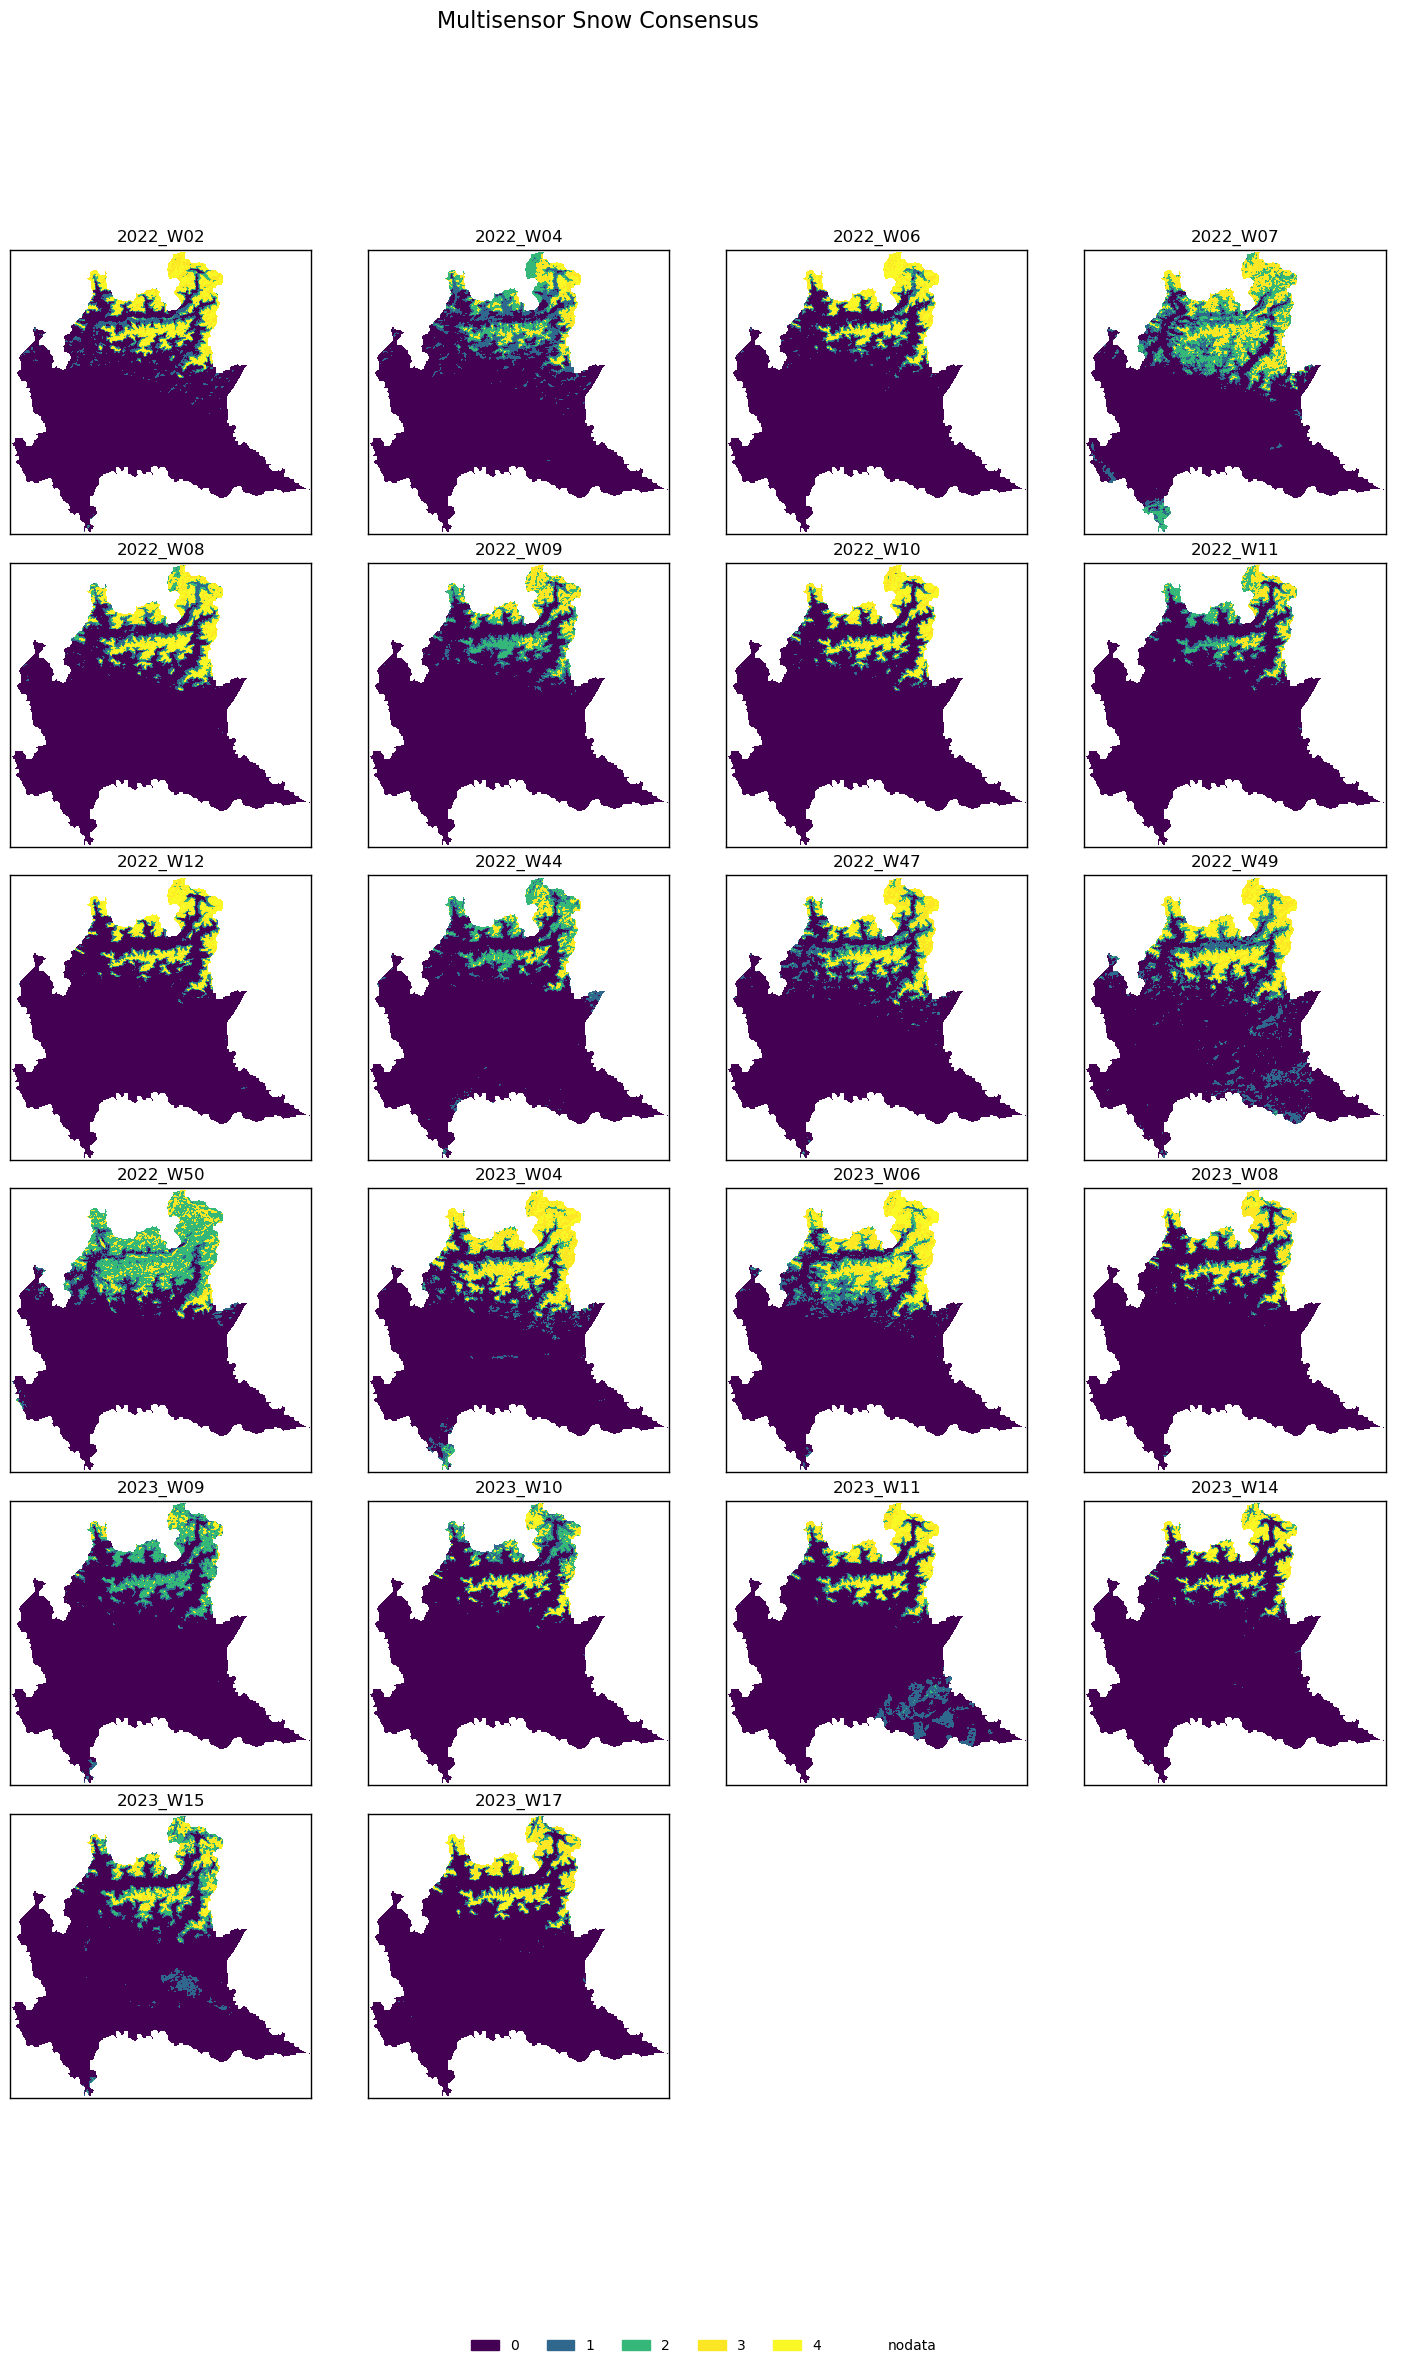

In [1]:
from snow_processing import compute_multisensor_snow_agreement

# Map each sensor to its clipped‐weekly‐tif folder
base_dirs = {
    'GFSC' : r'F:\GeoinformaticsProject\Data\Processed\CLIPPED\GFSC',
    'MODIS': r'F:\GeoinformaticsProject\Data\Processed\CLIPPED\MODIS',
    'S2'   : r'F:\GeoinformaticsProject\Data\Processed\CLIPPED\S2',
    'S3'   : r'F:\GeoinformaticsProject\Data\Processed\CLIPPED\S3',
}

# One output folder for all consensus TIFFs and the combined plot
output_dir = r'F:\GeoinformaticsProject\Data\Processed\MULTISENSOR_AGREEMENT'

# Single call: the function will
#  1. Find the intersection of weeks present in all four folders
#  2. Write one consensus TIFF per week into output_dir
#  3. Produce and display a mosaic plot of *all* weeks together
compute_multisensor_snow_agreement(
    inputs      = base_dirs,
    output_dir = output_dir
)


f:\GeoinformaticsProject\Code\Snow\snow_processing.py:47: SyntaxWarning: invalid escape sequence '\M'
  """


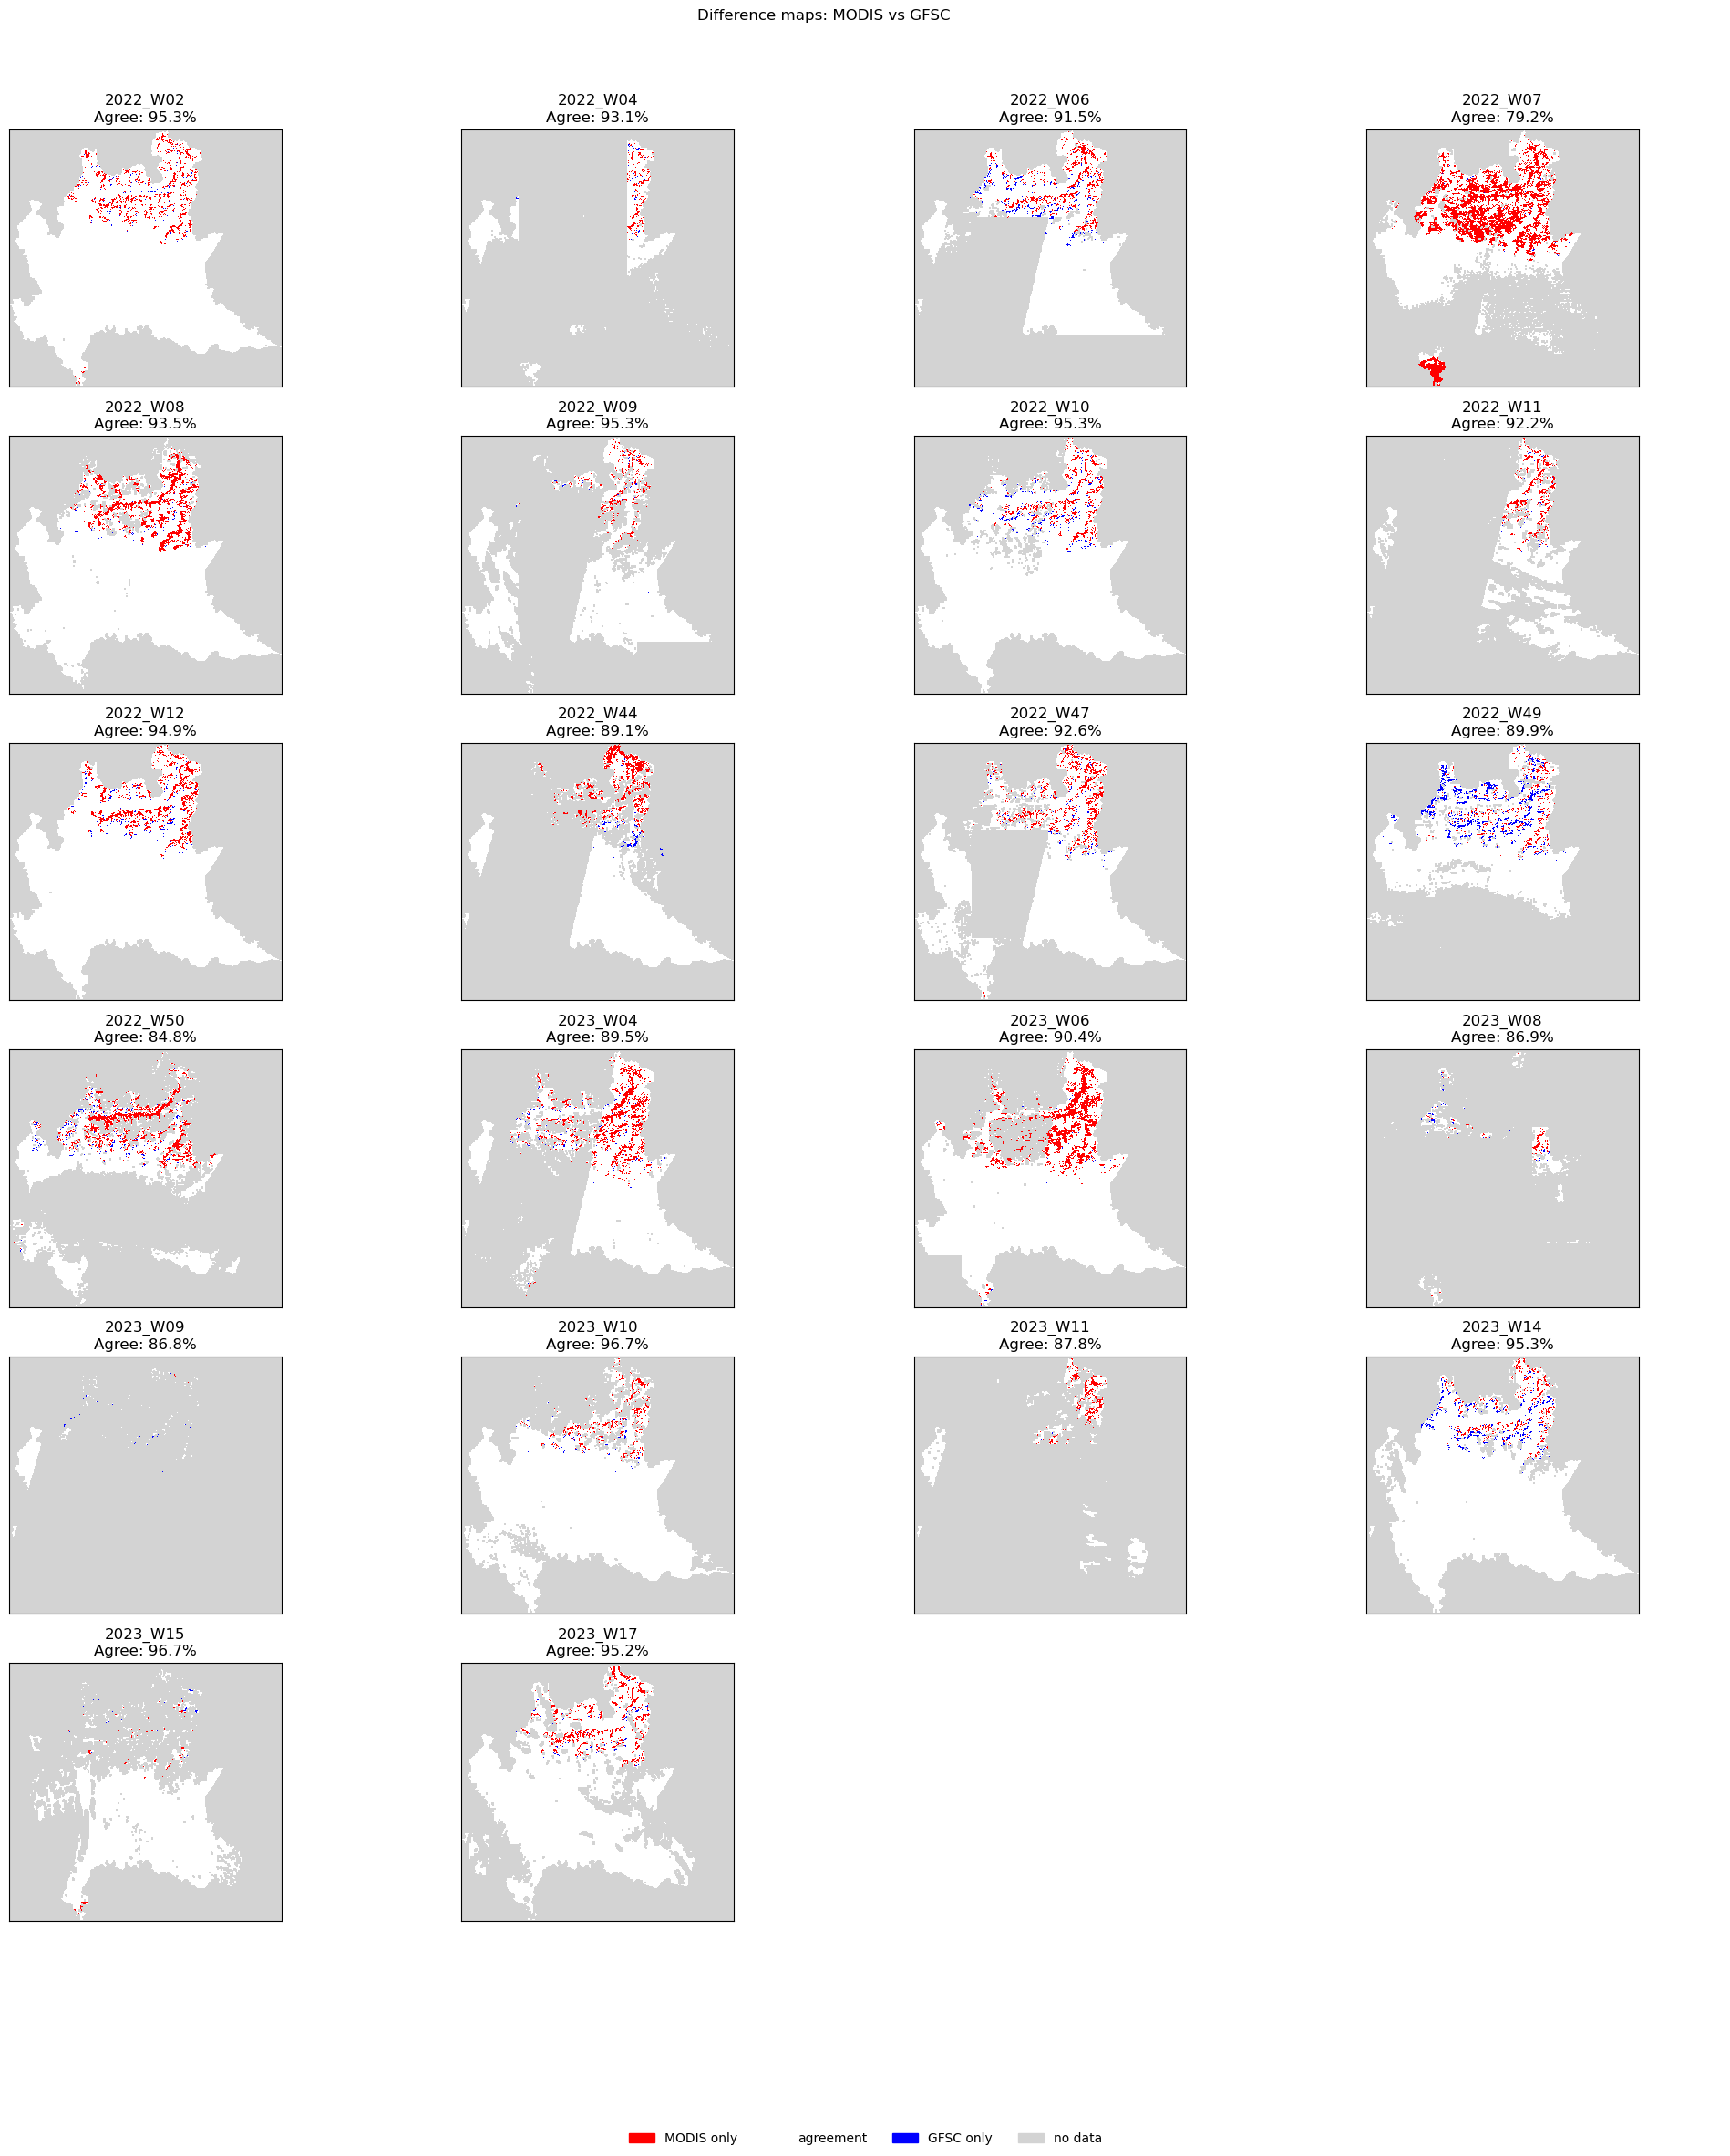

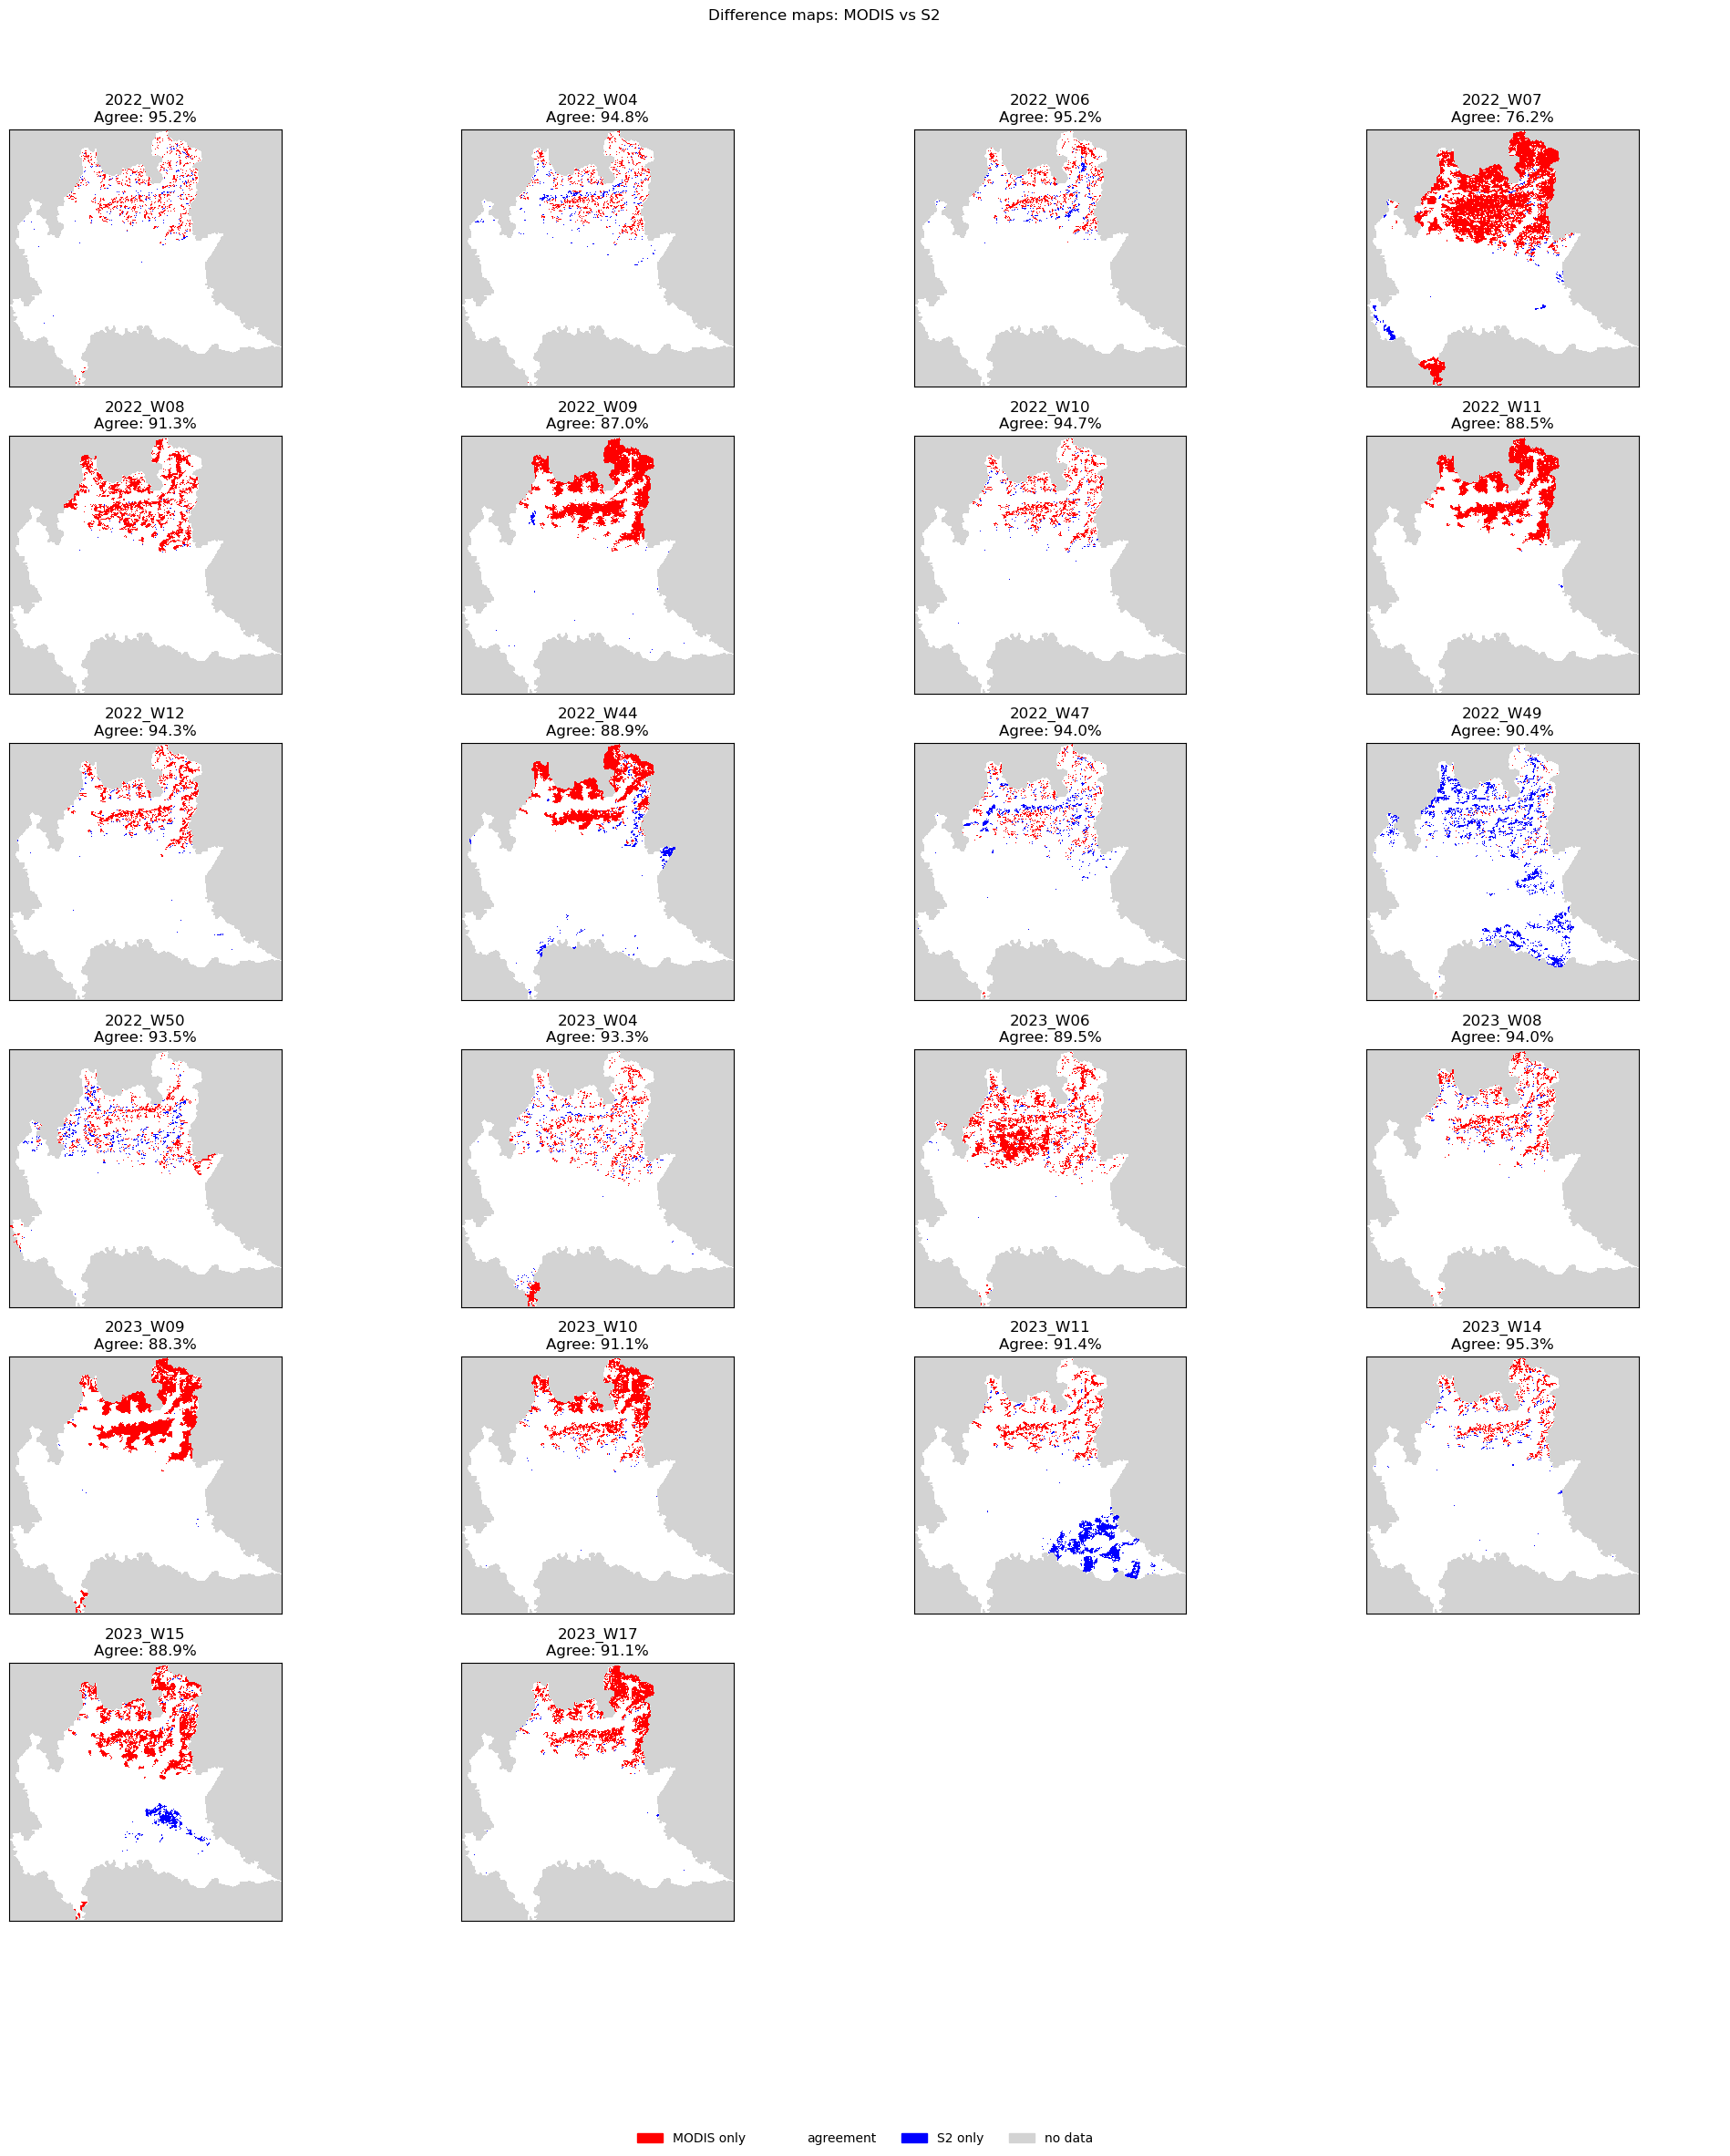

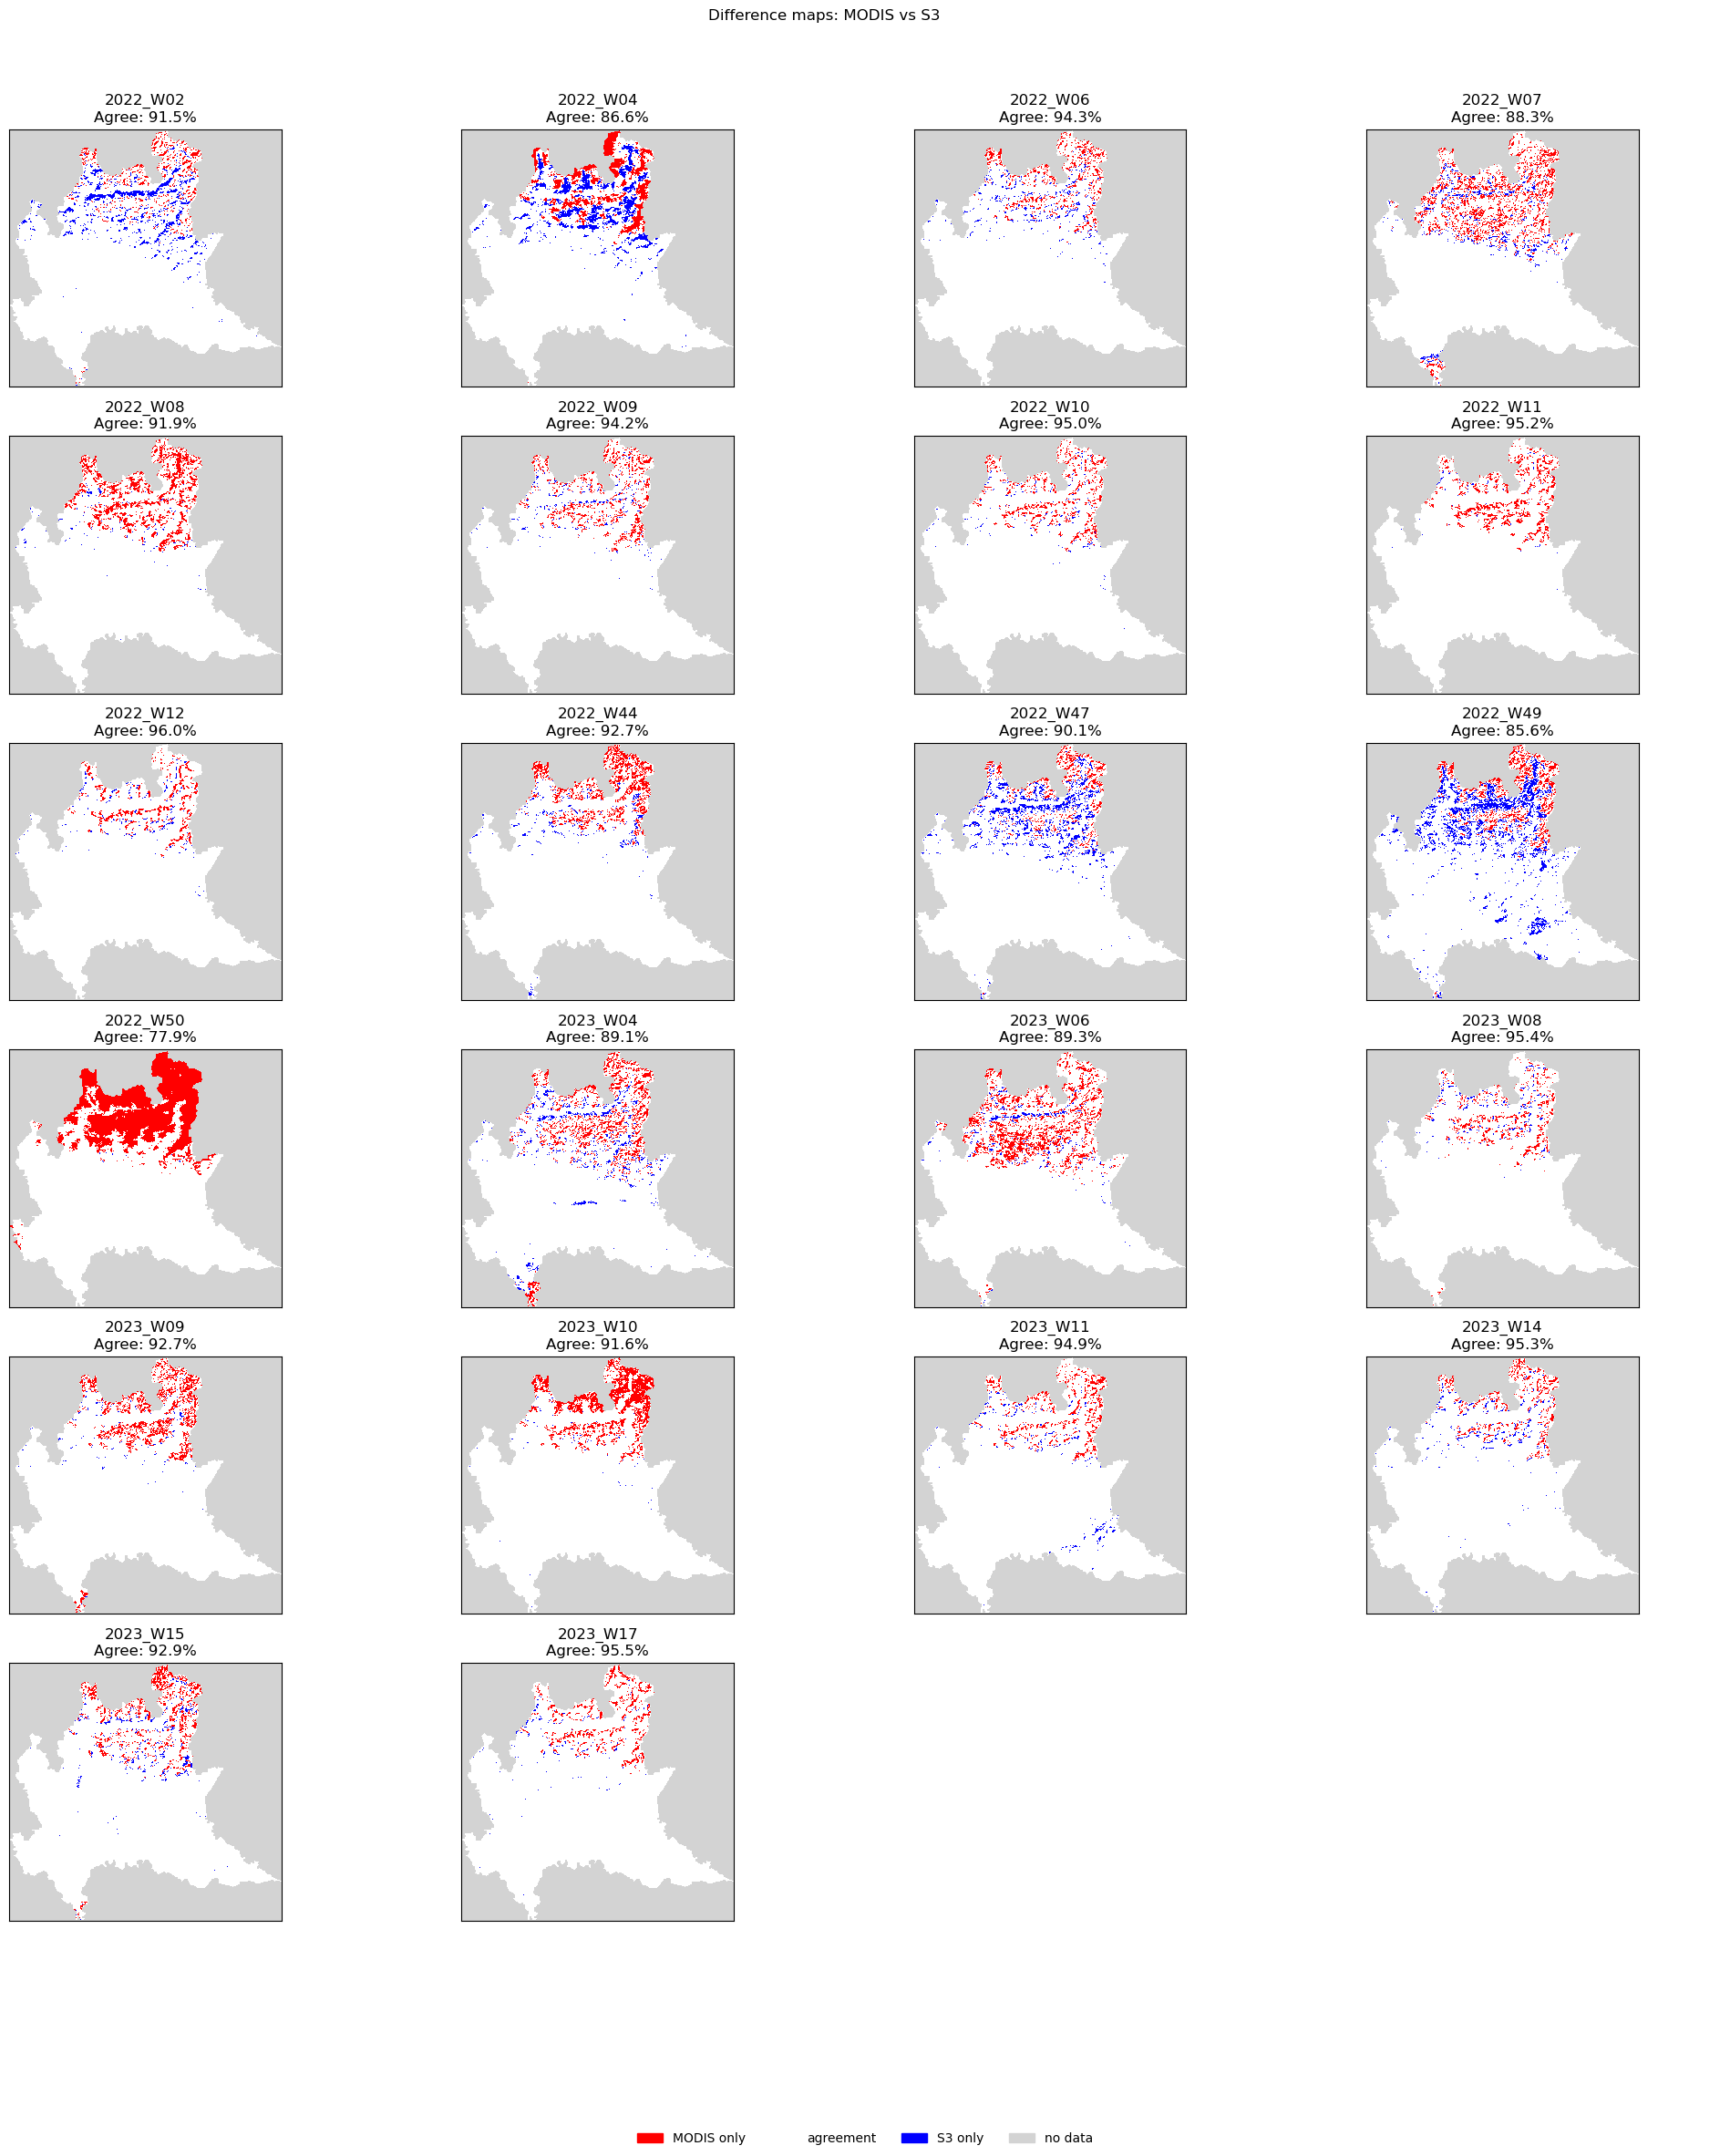

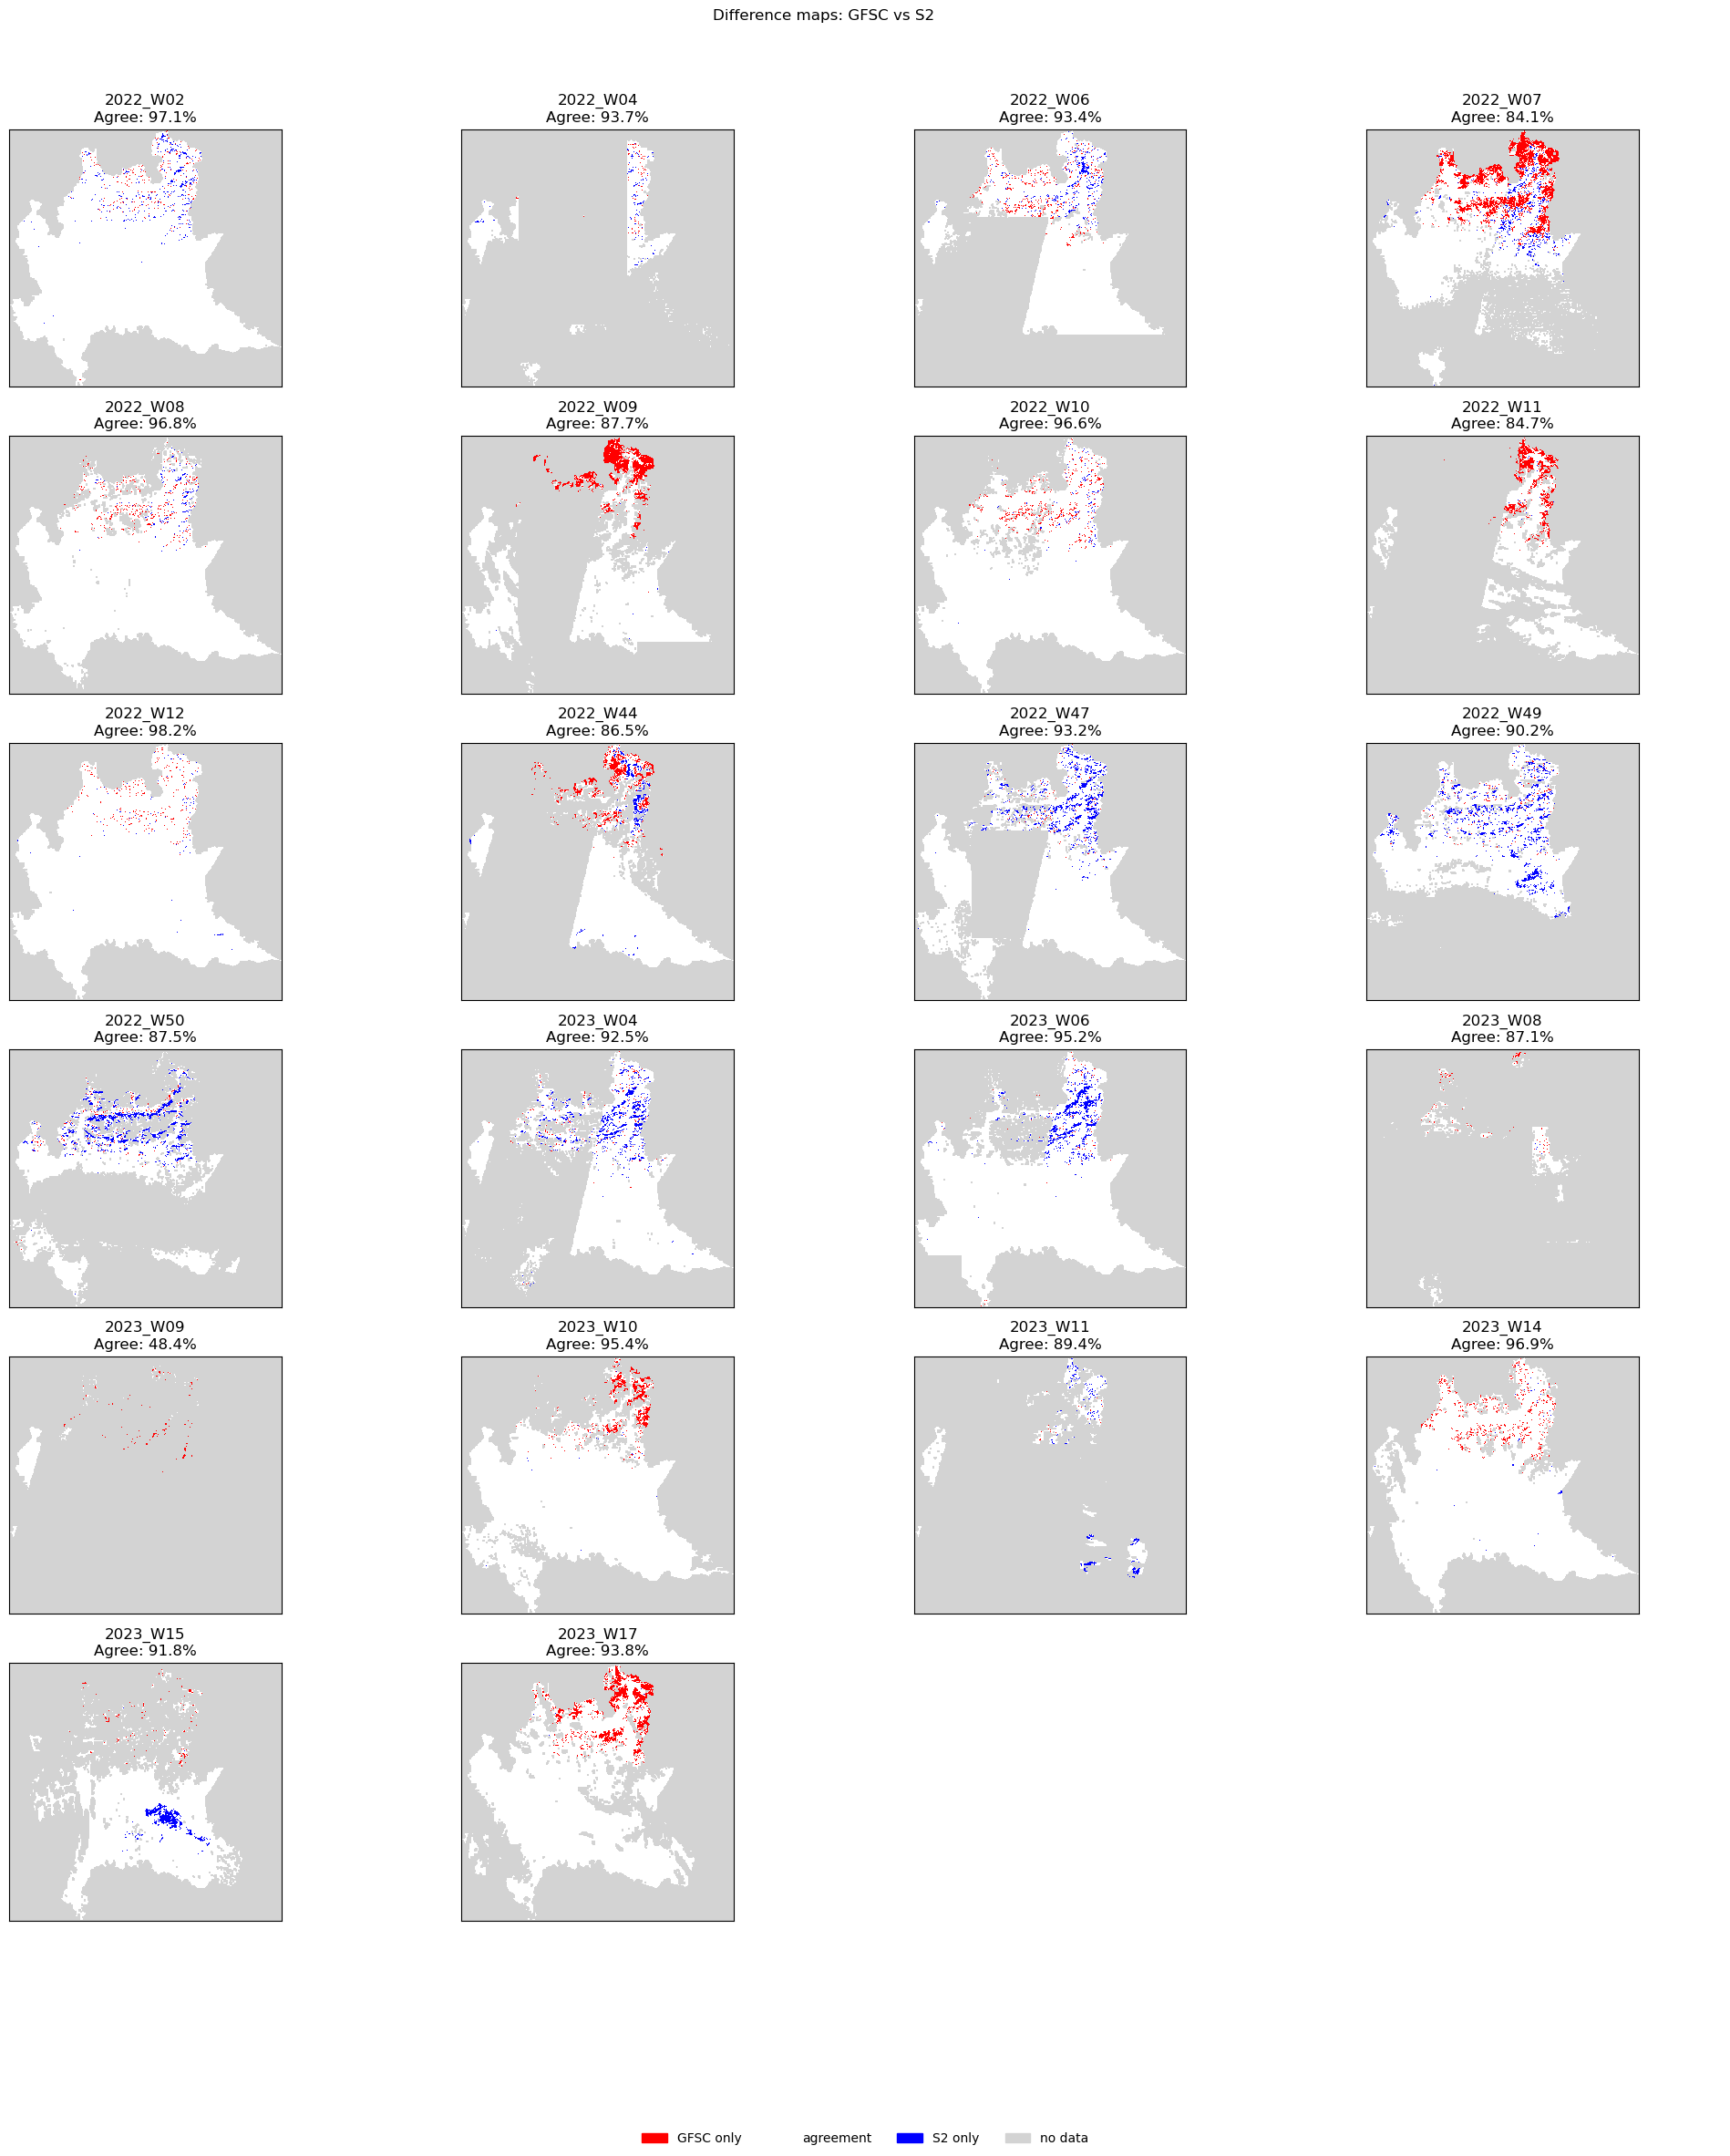

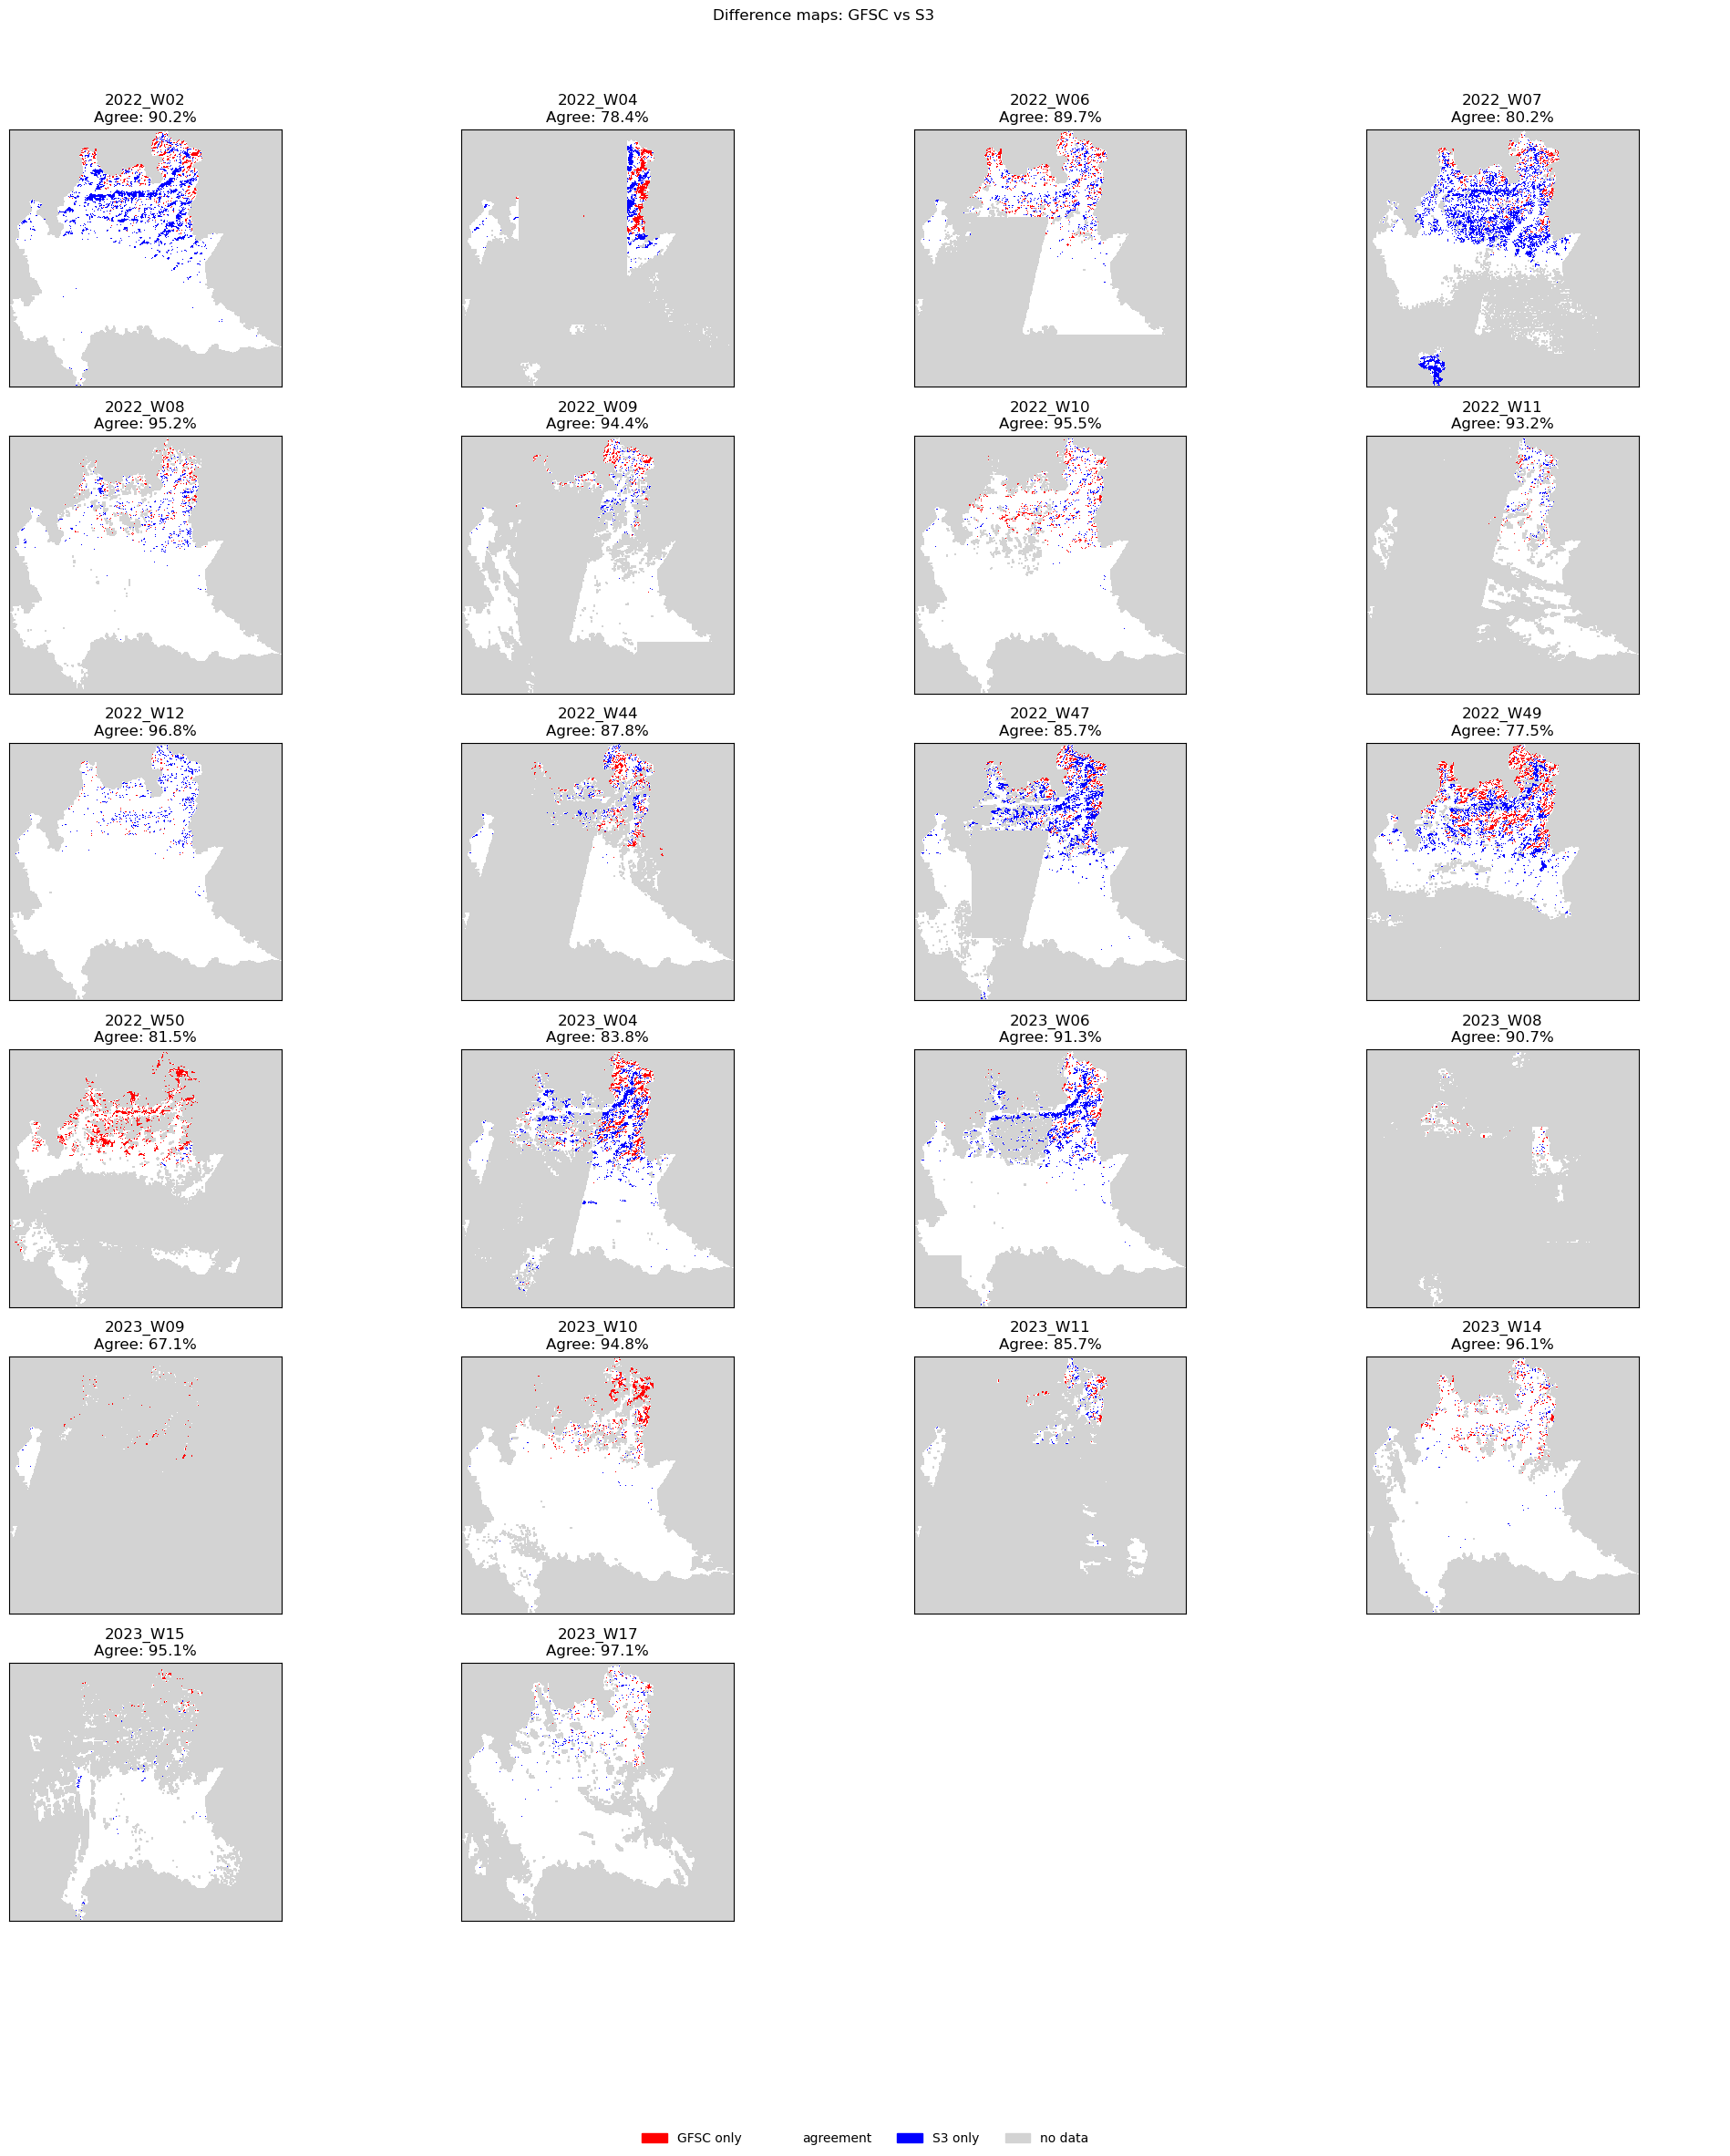

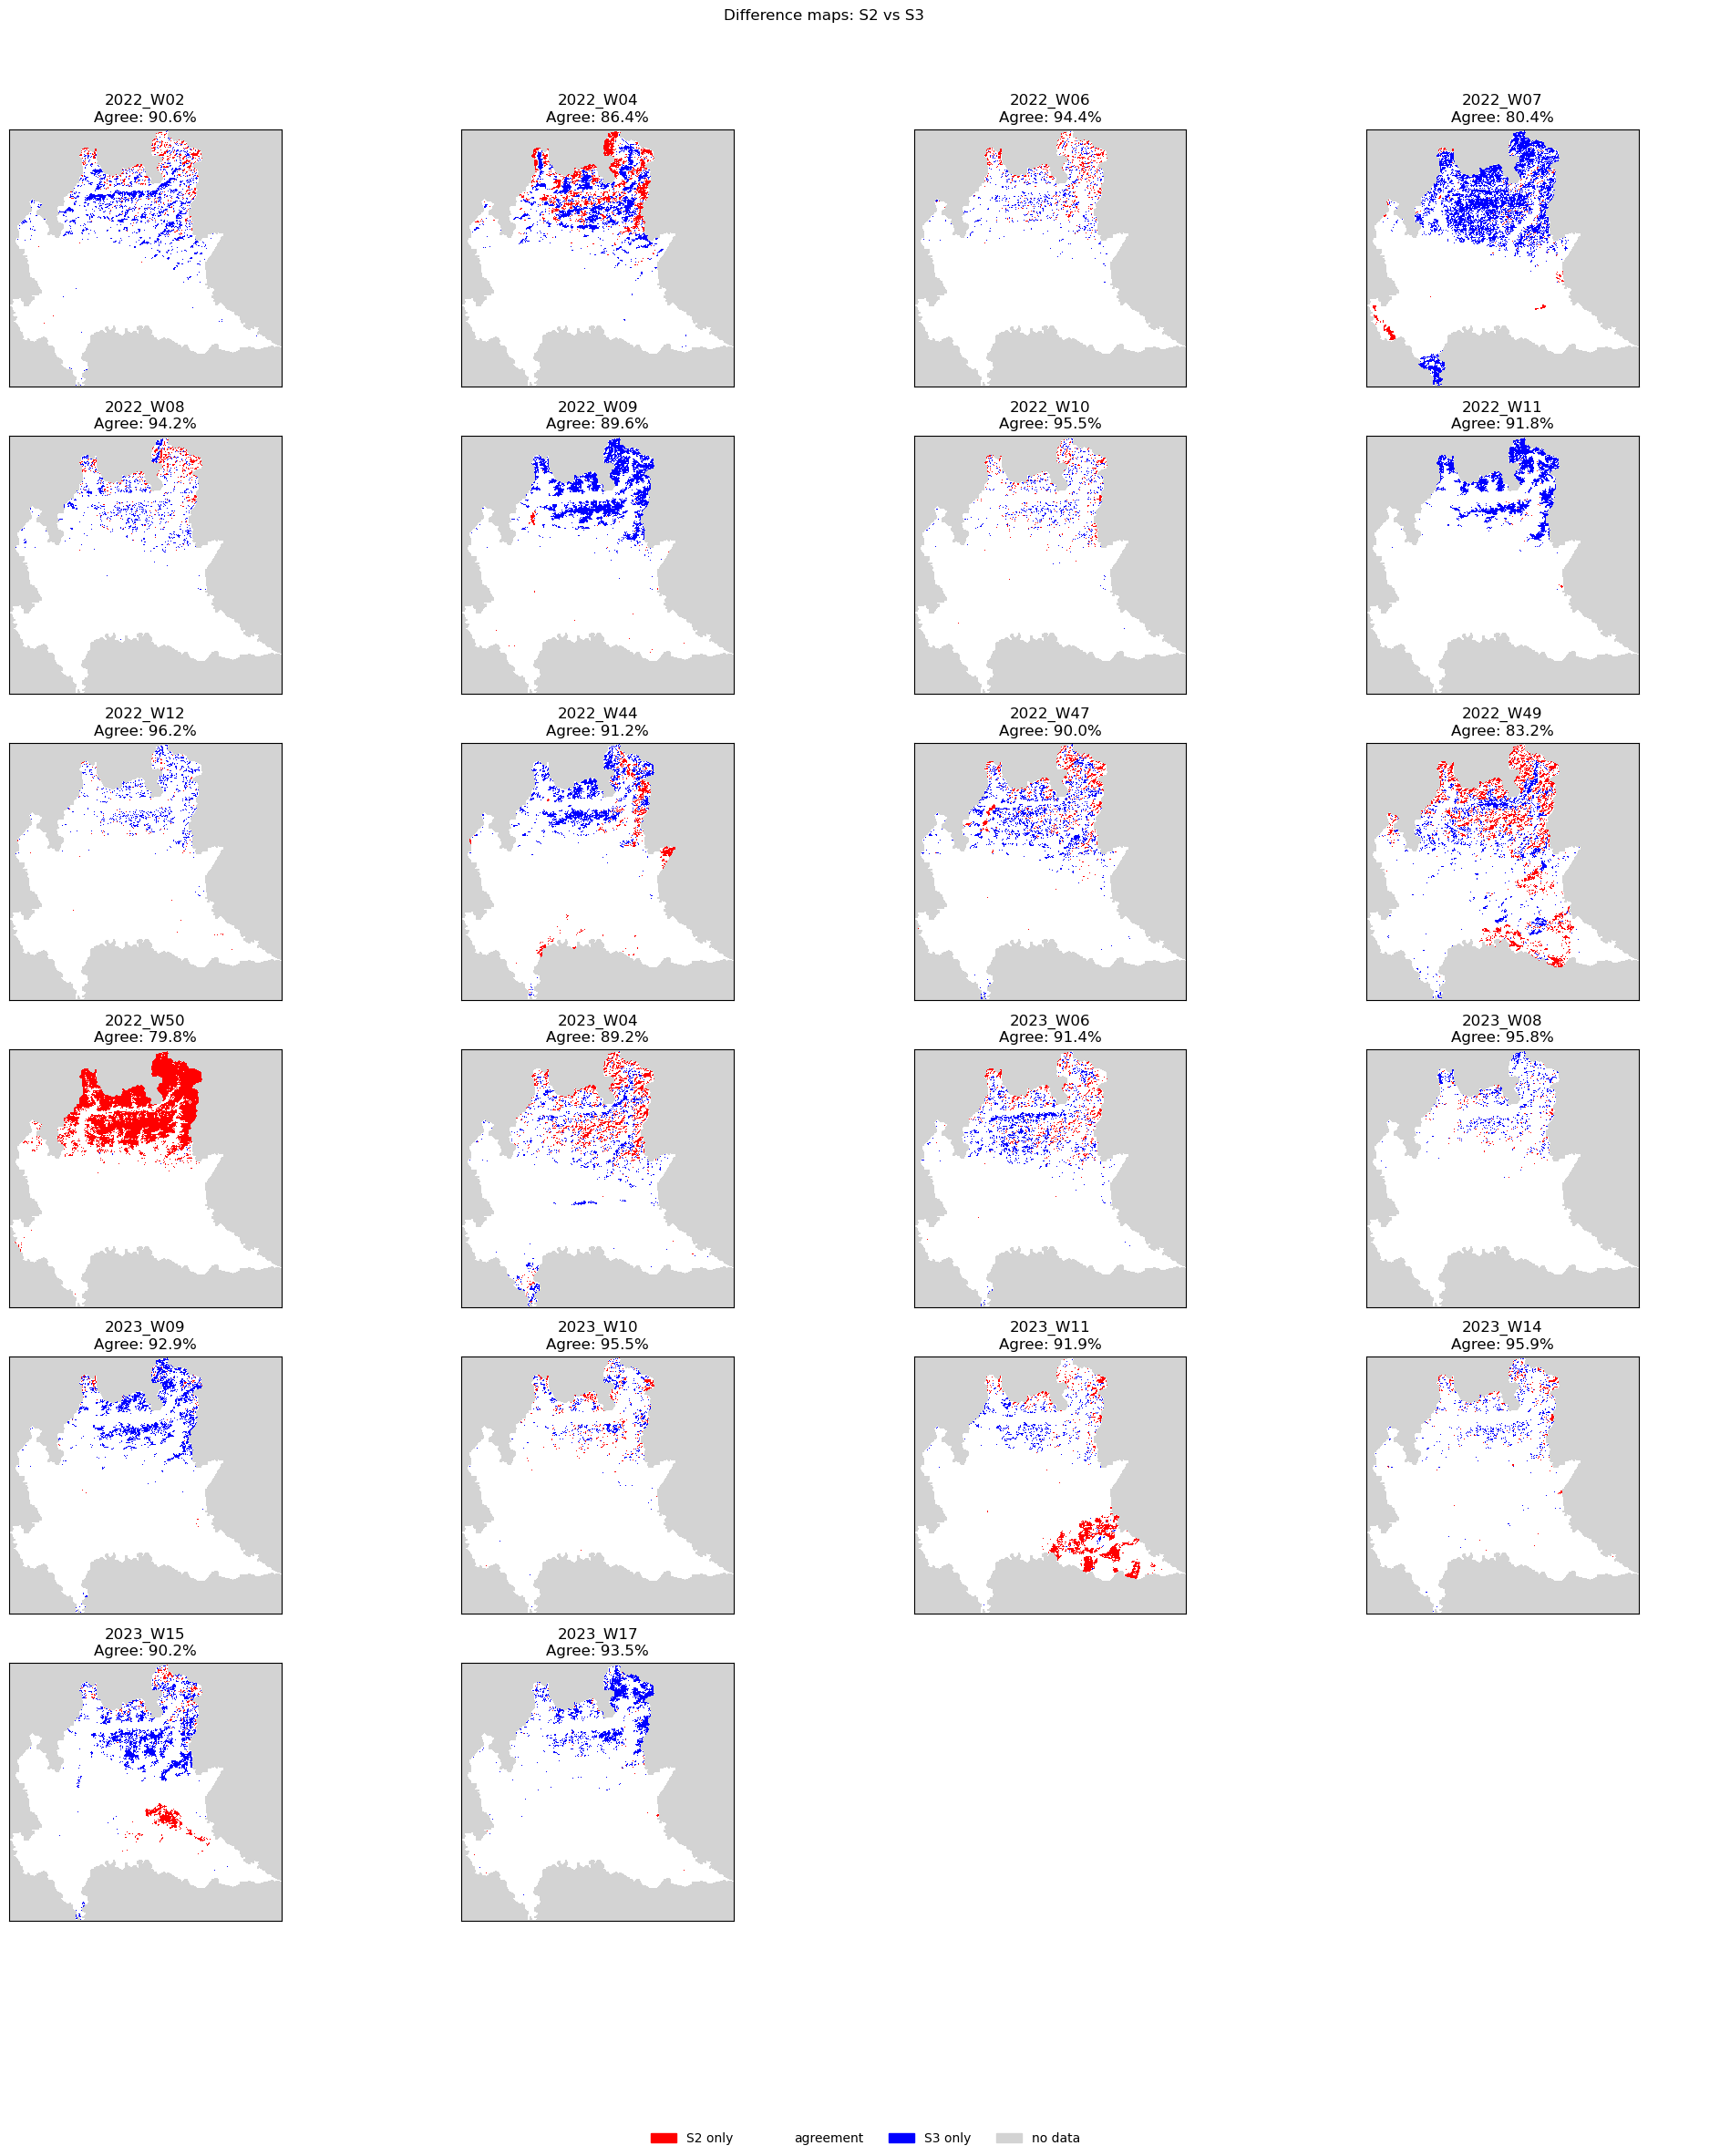

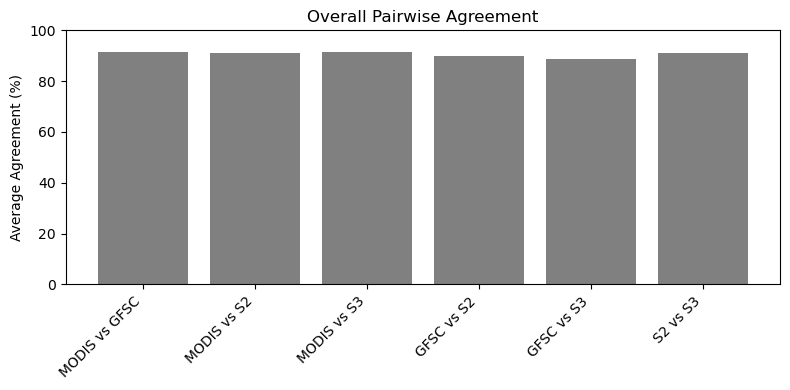

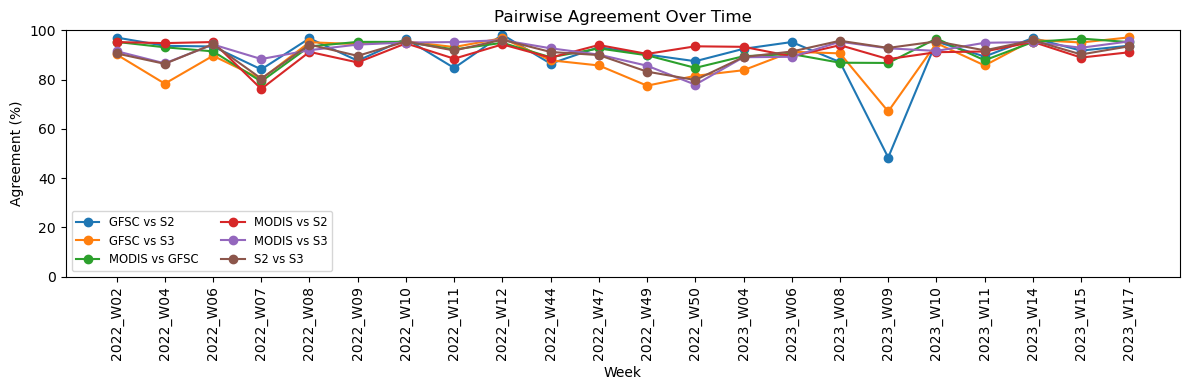

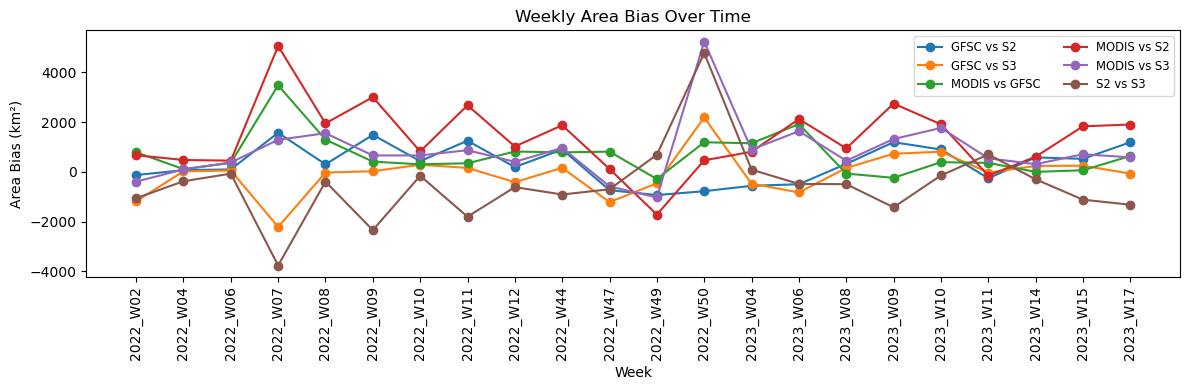

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

from snow_processing import compute_pairwise_agreement

# ── 1) PARAMETERS ────────────────────────────────────────────────────────────────
clipped_root = r"F:/GeoinformaticsProject/Data/Processed/CLIPPED"
products     = ["MODIS", "GFSC", "S2", "S3"]
common_weeks = [
    '2022_W02','2022_W04','2022_W06','2022_W07','2022_W08',
    '2022_W09','2022_W10','2022_W11','2022_W12','2022_W44',
    '2022_W47','2022_W49','2022_W50',
    '2023_W04','2023_W06','2023_W08','2023_W09','2023_W10',
    '2023_W11','2023_W14','2023_W15','2023_W17'
]

# ── 2) COMPUTE AGREEMENT + PLOT ALL DIFF‐MAP PANELS ──────────────────────────────
# This call will also pop up one multi‐panel figure per product‐pair.
df_agree = compute_pairwise_agreement(
    aligned_root = clipped_root,
    products     = products,
    common_weeks = common_weeks
)

# ── 3) PLOT TIME‐SERIES OF AGREEMENT (%) ────────────────────────────────────────
df_ts = (
    df_agree
      .pivot(index="week", columns=["prod1","prod2"], values="agreement_pct")
      .reindex(common_weeks)  # ensure consistent ordering
)

plt.figure(figsize=(12,4))
for pair in df_ts.columns:
    plt.plot(df_ts.index, df_ts[pair], marker='o', label=f"{pair[0]} vs {pair[1]}")
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.xlabel("Week")
plt.ylabel("Agreement (%)")
plt.title("Pairwise Agreement Over Time")
plt.legend(ncol=2, fontsize="small", loc="lower left")
plt.tight_layout()
plt.show()

# ── 4) PLOT TIME‐SERIES OF AREA BIAS (km²) ───────────────────────────────────────
df_bias = (
    df_agree
      .pivot(index="week", columns=["prod1","prod2"], values="area_bias_km2")
      .reindex(common_weeks)
)

plt.figure(figsize=(12,4))
for pair in df_bias.columns:
    plt.plot(df_bias.index, df_bias[pair], marker='o', label=f"{pair[0]} vs {pair[1]}")
plt.xticks(rotation=90)
plt.xlabel("Week")
plt.ylabel("Area Bias (km²)")
plt.title("Weekly Area Bias Over Time")
plt.legend(ncol=2, fontsize="small", loc="upper right")
plt.tight_layout()
plt.show()


In [7]:
# show the raw numbers, not the plotted line
print(
    df_agree
      .query("prod1 == 'S2' and prod2 == 'S3'")
      .loc[:, ["week","agreement_pct","p1_only_pixels","p2_only_pixels"]]
)


         week  agreement_pct  p1_only_pixels  p2_only_pixels
110  2022_W02      90.633265          163236          457610
111  2022_W04      86.404773          397802          503317
112  2022_W06      94.388417          175906          196041
113  2022_W07      80.413992          126591         1171609
114  2022_W08      94.191938          137703          247267
115  2022_W09      89.646105           18065          668212
116  2022_W10      95.469827          127861          172408
117  2022_W11      91.819198           21009          521231
118  2022_W12      96.195831           40669          211479
119  2022_W44      91.216863          164615          417549
120  2022_W47      89.959538          235401          430101
121  2022_W49      83.235677          651013          460160
122  2022_W50      79.834936         1330672            5909
123  2023_W04      89.156168          371440          347311
124  2023_W06      91.406250          217103          352508
125  2023_W08      95.76